# Travail pratique 3
*INF600F - Traitement d'images (H2022, UQÀM)*

* Indiquez ici votre prénom/nom et code permanent.
Yan-Alexandre Leclerc LECY20069604
Pedro-Luis Bernardos BERP01039907
* Modifiez aussi le nom du notebook pour qu'il ait ce format : `TP3-NOM1_NOM2`, où `NOM{k}` est le nom de famille de chaque membre de votre équipe.

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import tp3

# Importation des modules pertinents ici.
# Assurez-vous d'inclure toute autre fonction que vous
# jugez nécessaires ici
import skimage
import math
import skimage.filters as fil
#import skimage.filters.threshold_mean
#import skimage.filters.threshold_triangle
#import skimage.filters.threshold_otsu
#import skimage.filters.threshold_li

# Exercice 1 : Bruit exponentiel

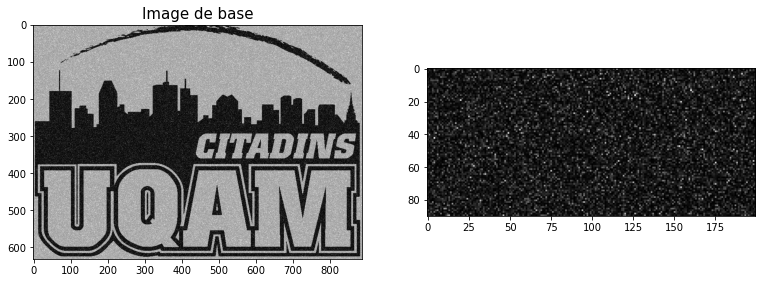

In [2]:
im_ex1 = imageio.imread("tp3_ex1.tiff")
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('Image de base', fontsize=15)
plt.imshow(im_ex1, cmap='gray');

r_uni = im_ex1[280:370, 200:400]
plt.subplot(132)
plt.imshow(r_uni, cmap='gray');

plt.show()

nb_pixels = r_uni.shape[0]*r_uni.shape[1]
intensite, compteur = np.unique(r_uni, return_counts = True)

#calcul de moyenne mu
mu = 0.0
for i in range(intensite.size):
    mu += intensite[i]*(compteur[i]/nb_pixels)

#calcul de la variance
var = 0.0
for i in range(intensite.size):
    var += ((intensite[i]-mu)**2)*(compteur[i]/nb_pixels)

#estimation du paramètre a par moyenne et variance
mu_a = 1/mu
var_a = (1/var)**0.5

print ("Estimation de la moyenne : ", mu)
print ("Estimation de la variance: ", var)
print ("Paramètre 'a' estimé par moyenne: ", mu_a)
print ("Paramètre 'a' estimé par variance: ", var_a)

# Démarche

## Étapes

### Étape 1

Premièrement, il faut isoler une section uniforme de l'image (dans le cas présent, une zone grise ou noire).

### Étape 2

Par la suite, en prennant le nombre total de pixels, il faut calculer la somme du produit de chaque intensité de pixel selon sa probabilité (fonction np.unique ainsi qu'une boucle pour parcourir chaque pixel).

### Étape 3

À partir de la moyenne obtenue à l'étape 2, il faut calculer la variance (à l'aide d'une boucle pour parcourir chaque pixel).

### Étape 4

Tel que le théorème pour la distribution exponentielle *b=1*, on obtient le paramètre moyenne de *a* avec la division de 1 par la moyenne. Pour ce qui est du paramètre variance de *a*, il faut prendre la racine carré de la division de 1 par la variance.

# Exercice 2 : Télescope spatial James-Webb

In [3]:
# Initialisation du télescope
telescope = tp3.JamesWebbSimulator('LECY20069604 et <celui de mon collègue>')

# Importation de l'image de l'étoile HD85506 pour la calibration
im_ex2 = imageio.imread('tp3_ex2.tiff')

Estimation de la moyenne :  23.196611111111118
Estimation de la variance:  554.8681774043208
Paramètre 'a' estimé par moyenne:  0.04310974543695318
Paramètre 'a' estimé par variance:  0.042452677938827954


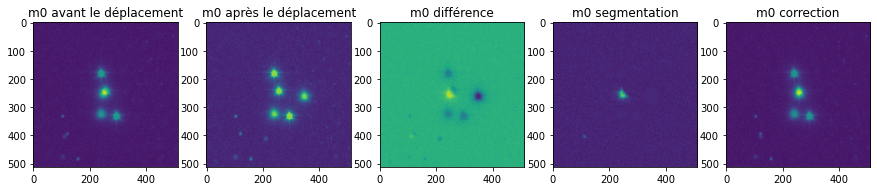

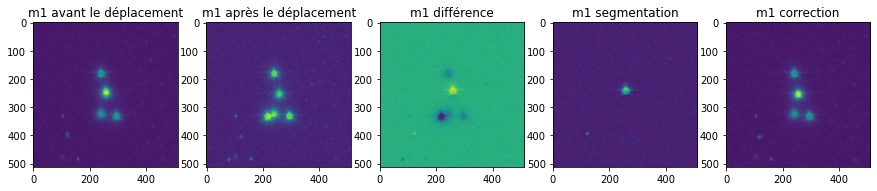

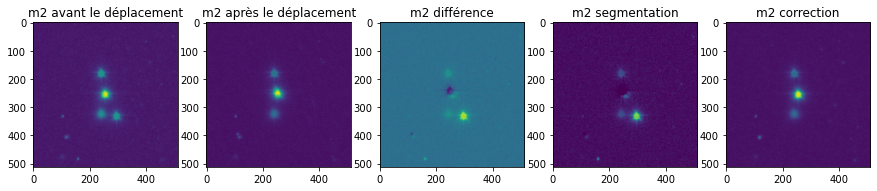

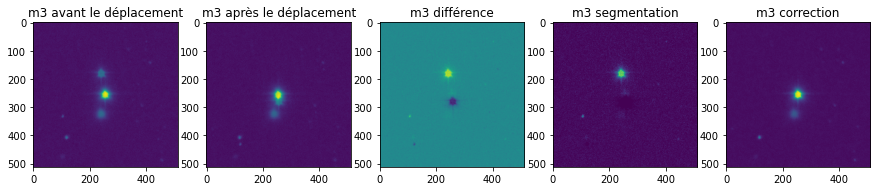

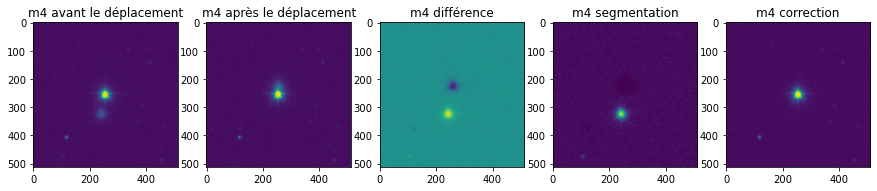

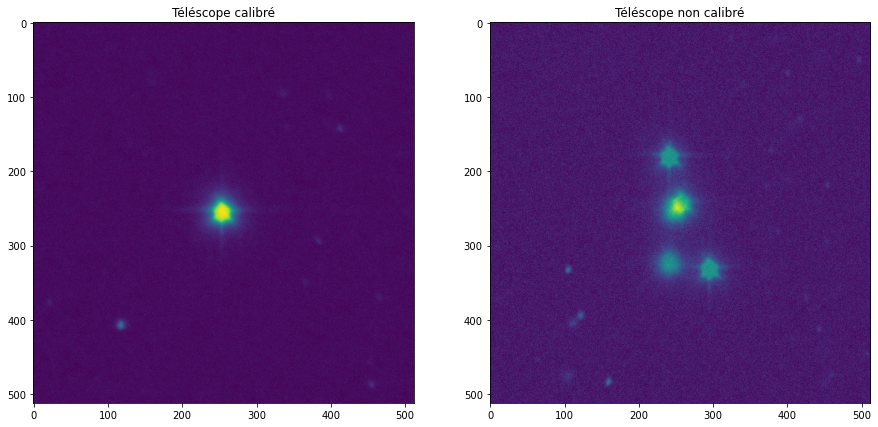

In [4]:
# Algorithme de calibration à compléter
def calibration(telescope: tp3.JamesWebbSimulator, image: np.ndarray) -> tp3.JamesWebbSimulator:
    """ Calibration du télescope.
    Parameters
    ----------
    telescope: tp3.JamesWebbSimulator
        Télescope à calibrer
    image: np.ndarray
        Image à utiliser pour la calibration (étoile isolée HD84406)
    Returns
    -------
    telescope: tp3.JamesWebbSimulator
        Télescope calibré    
    """
    for i in range(telescope.nb_mirrors):
        
        img1 = telescope.simulate(image)
        telescope.move_mirror_by(i, -100)
        plt.figure(figsize=(15,15))
        plt.subplot(151)
        plt.title("m" + str(i) + " avant le déplacement")
        plt.imshow(img1)
        
        img2 = telescope.simulate(image)
        plt.subplot(152)
        plt.title("m" + str(i) + " après le déplacement")
        plt.imshow(img2)
        telescope.move_mirror_by(i, 100)
        
        img_diff = img1 - img2
        plt.subplot(153)
        plt.title("m" + str(i) + " différence")
        plt.imshow(img_diff)
        
        seuil = skimage.filters.threshold_otsu(img_diff)
        masque = img_diff > seuil
        segmentation = img_diff * masque
        plt.subplot(154)
        plt.title("m" + str(i) + " segmentation")
        plt.imshow(segmentation)
        segmentation[segmentation > 0.2] = 0.8
        y, x = np.nonzero(segmentation > 0.2)
        
        x_moy = x.mean(); y_moy = y.mean()
        c = math.sqrt(math.pow((x_moy - 256),2) + math.pow((y_moy - 256),2))
        telescope.set_mirror_correction(i, -c)
        img3 = telescope.simulate(image)
        plt.subplot(155)
        plt.title("m" + str(i) + " correction")
        plt.imshow(img3)
        #plt.show()
        pass
    return telescope

image = imageio.imread('tp3_ex2.tiff')
telescope = tp3.JamesWebbSimulator('LECY20069604 et BERP01039907')
telescope_calibre = calibration(telescope, image)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.title("Téléscope calibré")
plt.imshow(telescope_calibre.simulate(image))
plt.subplot(122)
plt.title("Téléscope non calibré")
telescope.reset()
plt.imshow(telescope.simulate(image))
plt.show()

# Question
##  Suggérez une façon de calibrer les miroirs, basée sur l’analyse d’image, pour corriger leur focus.

Une simple déconvolution de Weiner permet de corriger le focus d'une image. Il existe des fonctions dans skymage.transformation qui permettent de calibrer le focus d'une image.


# Exercice 3 : Segmentation d'une angiographie

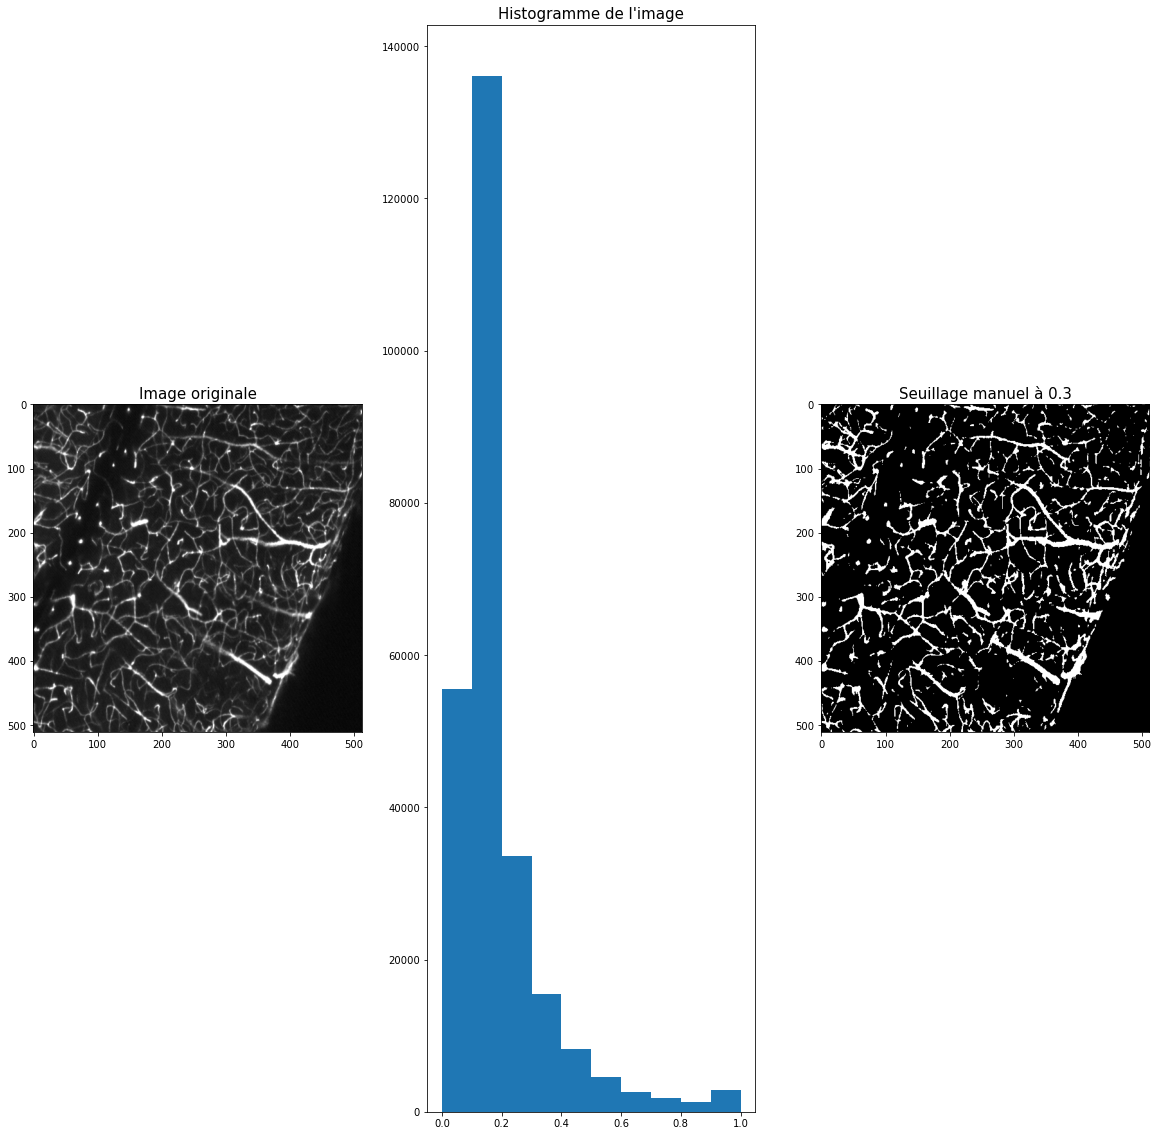

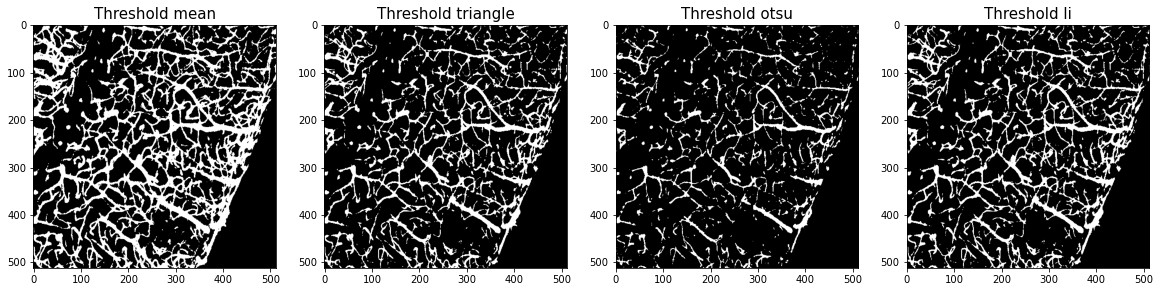

/var/folders/8b/33jh03ld18sbj3852k2kx9800000gn/T/ipykernel_10360/899273682.py:57: RuntimeWarning: invalid value encountered in true_divide
  dice_manuel = 2*abs(im_ex3_manuel[0:128, 0:128]*im_ex3_annotation) / (abs(im_ex3_manuel[0:128, 0:128]) + abs(im_ex3_annotation))
/var/folders/8b/33jh03ld18sbj3852k2kx9800000gn/T/ipykernel_10360/899273682.py:58: RuntimeWarning: invalid value encountered in true_divide
  dice_triangle = 2*abs(im_ex3_triangle[0:128, 0:128]*im_ex3_annotation) / (abs(im_ex3_triangle[0:128, 0:128]) + abs(im_ex3_annotation))
/var/folders/8b/33jh03ld18sbj3852k2kx9800000gn/T/ipykernel_10360/899273682.py:59: RuntimeWarning: invalid value encountered in true_divide
  dice_otsu = 2*abs(im_ex3_otsu[0:128, 0:128]*im_ex3_annotation) / (abs(im_ex3_otsu[0:128, 0:128]) + abs(im_ex3_annotation))
/var/folders/8b/33jh03ld18sbj3852k2kx9800000gn/T/ipykernel_10360/899273682.py:60: RuntimeWarning: invalid value encountered in true_divide
  dice_li = 2*abs(im_ex3_li[0:128, 0:128]*im_ex3_an

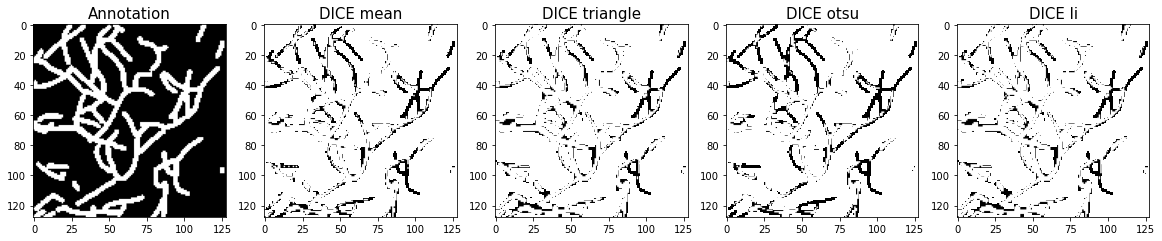

In [5]:
im_ex3 = imageio.imread('tp3_ex3.tiff')
im_ex3_annotation = imageio.imread('tp3_ex3_annotation.tiff')
im_ex3_hist = im_ex3.flatten()

t_manuel = 0.3
im_ex3_manuel = im_ex3 > t_manuel
seg_im_ex3_manuel = im_ex3.copy()
seg_im_ex3_manuel[im_ex3_manuel == False] = 0

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('Image originale', fontsize=15)
plt.imshow(im_ex3, cmap='gray')
plt.subplot(132)
plt.title('Histogramme de l\'image', fontsize=15)
plt.hist(im_ex3_hist, 10)
plt.subplot(133)
plt.title('Seuillage manuel à 0.3', fontsize=15)
plt.imshow(im_ex3_manuel, cmap='gray') 
plt.show()

t_mean = fil.threshold_mean(im_ex3)
im_ex3_mean = im_ex3 > t_mean
seg_im_ex3_mean = im_ex3.copy()
seg_im_ex3_mean[im_ex3_mean == False] = 0

t_triangle = fil.threshold_triangle(im_ex3)
im_ex3_triangle = im_ex3 > t_triangle
seg_im_ex3_triangle = im_ex3.copy()
seg_im_ex3_triangle[im_ex3_triangle == False] = 0

t_otsu = fil.threshold_otsu(im_ex3)
im_ex3_otsu = im_ex3 > t_otsu
seg_im_ex3_otsu = im_ex3.copy()
seg_im_ex3_otsu[im_ex3_otsu == False] = 0

t_li = fil.threshold_li(im_ex3)
im_ex3_li = im_ex3 > t_li
seg_im_ex3_li = im_ex3.copy()
seg_im_ex3_li[im_ex3_li == False] = 0

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.title('Threshold mean', fontsize=15)
plt.imshow(im_ex3_mean, cmap='gray')
plt.subplot(142)
plt.title('Threshold triangle', fontsize=15)
plt.imshow(im_ex3_triangle, cmap='gray')
plt.subplot(143)
plt.title('Threshold otsu', fontsize=15)
plt.imshow(im_ex3_otsu, cmap='gray')
plt.subplot(144)
plt.title('Threshold li', fontsize=15)
plt.imshow(im_ex3_li, cmap='gray');
plt.show()

dice_manuel = 2*abs(im_ex3_manuel[0:128, 0:128]*im_ex3_annotation) / (abs(im_ex3_manuel[0:128, 0:128]) + abs(im_ex3_annotation))
dice_triangle = 2*abs(im_ex3_triangle[0:128, 0:128]*im_ex3_annotation) / (abs(im_ex3_triangle[0:128, 0:128]) + abs(im_ex3_annotation))
dice_otsu = 2*abs(im_ex3_otsu[0:128, 0:128]*im_ex3_annotation) / (abs(im_ex3_otsu[0:128, 0:128]) + abs(im_ex3_annotation))
dice_li = 2*abs(im_ex3_li[0:128, 0:128]*im_ex3_annotation) / (abs(im_ex3_li[0:128, 0:128]) + abs(im_ex3_annotation))

plt.figure(figsize=(20,20))
plt.subplot(151)
plt.title('Annotation', fontsize=15)
plt.imshow(im_ex3_annotation, cmap='gray')
plt.subplot(152)
plt.title('DICE mean', fontsize=15)
plt.imshow(dice_manuel, cmap='gray')
plt.subplot(153)
plt.title('DICE triangle', fontsize=15)
plt.imshow(dice_triangle, cmap='gray')
plt.subplot(154)
plt.title('DICE otsu', fontsize=15)
plt.imshow(dice_otsu, cmap='gray')
plt.subplot(155)
plt.title('DICE li', fontsize=15)
plt.imshow(dice_li, cmap='gray');
plt.show()

# Question
## Selon vous, quels avantages et limitations y a-t-il à utiliser un seuillage global déterminé automatiquement pour segmenter la microvasculature?

L'historigramme n'est pas précis pour le choix du seuil optimal si on se base uniquement sur celui-ci. Des méthodes de seuillage automatiques comme celle d'Otsu, utilisent la variance pour le groupe d'arrière plan, d'avant plan ainsi que la variance inter-classes afin de trouver le seuil qmax optimal. Cette méthode rends le seuillage plus rapide et efficace.